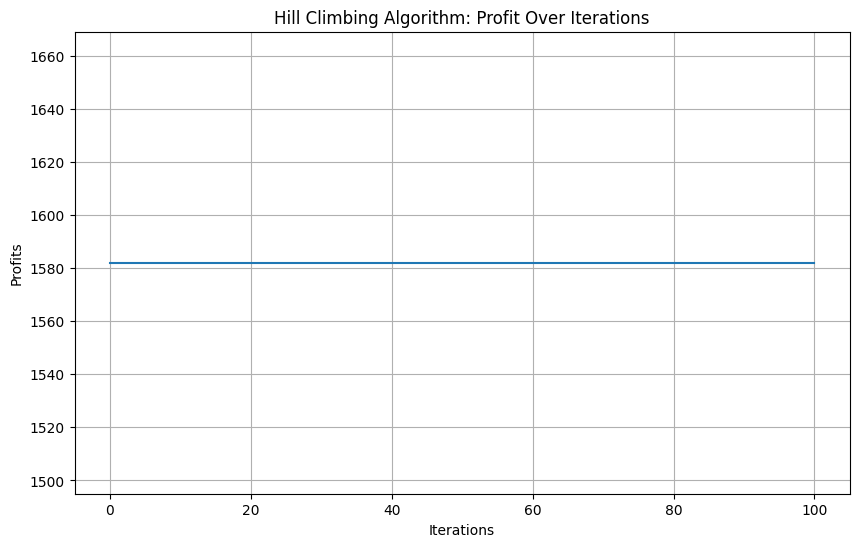

In [2]:
# 爬山演算法
import numpy as np
import matplotlib.pyplot as plt

# 背包問題的參數
weights = np.array([41, 50, 49, 59, 55, 57, 60])
values = np.array([442, 525, 511, 593, 546, 564, 617])
max_weight = 170

# 評估函數
def evaluate(solution):
    total_weight = np.sum(solution * weights)
    total_value = np.sum(solution * values)
    return total_weight, total_value

# 生成鄰近解
def get_neighbors(solution):
    neighbors = []
    for i in range(len(solution)):
        neighbor = solution.copy()
        neighbor[i] = 1 - neighbor[i] # 它將neighbor在索引i的位置上的值取反
        neighbors.append(neighbor)
    return neighbors

# 確保只記錄有效解的利潤
def hill_climbing_with_valid_history(max_iterations=100):
    current_solution = np.random.randint(2, size=len(weights))
    current_weight, current_value = evaluate(current_solution)
    history = []
    
    # 確保初始解符合重量限制，並開始時記錄有效的解
    while current_weight > max_weight:
        current_solution = np.random.randint(2, size=len(weights))
        current_weight, current_value = evaluate(current_solution)
    history.append(current_value)  # 初始解為有效解時記錄
    
    # 在迭代時找當強姐的所有鄰居，並將最佳鄰居作為新的當前解
    for _ in range(max_iterations):
        neighbors = get_neighbors(current_solution)
        best_neighbor = current_solution
        best_weight, best_value = current_weight, current_value
        
        for neighbor in neighbors:
            weight, value = evaluate(neighbor)
            if weight <= max_weight and value > best_value:
                best_neighbor = neighbor
                best_weight = weight
                best_value = value
        
        # 確保在找到更好的解時更新歷史記錄
        if best_value > current_value and best_weight <= max_weight:
            current_solution = best_neighbor
            current_weight, current_value = best_weight, best_value
        
        history.append(current_value)
    
    return history

# 執行算法並記錄每次迭代的最佳利潤
profit_history = hill_climbing_with_valid_history()

# 使用matplotlib繪製迭代次數對利潤的圖表
plt.figure(figsize=(10, 6))
plt.plot(profit_history)
plt.title("Hill Climbing Algorithm: Profit Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Profits")
plt.grid(True)
plt.show()


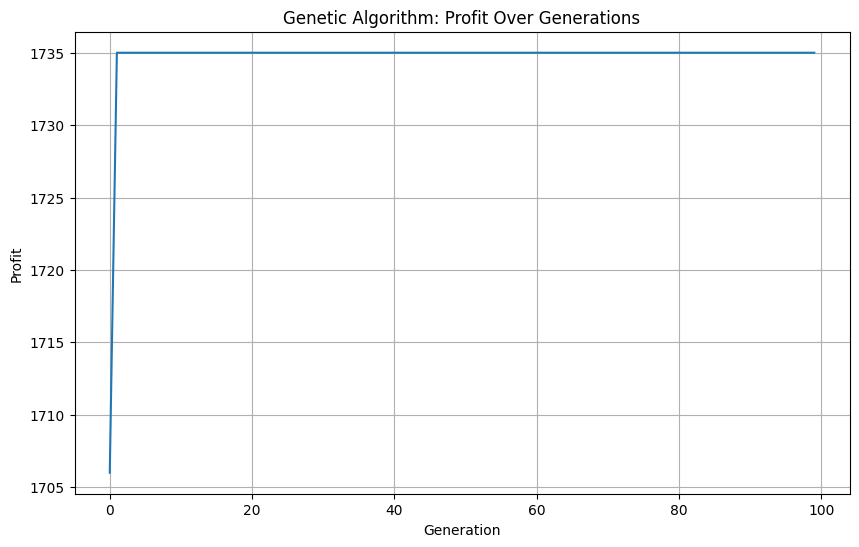

In [3]:
# 基因演算法
import numpy as np
import matplotlib.pyplot as plt

# 背包問題參數
weights = np.array([41, 50, 49, 59, 55, 57, 60])
values = np.array([442, 525, 511, 593, 546, 564, 617])
max_weight = 170
population_size = 50
mutation_rate = 0.01
max_generations = 100
elitism_size = 1  # 精英策略保留的個體數量

# 適應度函數，超過限制設為0，適應度為總價值
def fitness(solution):
    total_weight = np.sum(solution * weights)
    total_value = np.sum(solution * values)
    if total_weight > max_weight:
        return 0  # 超重的解適應度為0
    else:
        return total_value

# 初始化群體，使用二進制
def initialize_population(size):
    return np.random.randint(2, size=(size, len(weights)))

# 選擇，是適應度越高越可能被選到，並且保留一個位置給菁英個體
def select(population, fitness_scores):
    probabilities = fitness_scores / np.sum(fitness_scores)
    selected_indices = np.random.choice(np.arange(len(population)), size=len(population) - elitism_size, replace=True, p=probabilities)
    return population[selected_indices]

# 交叉，進行單點交叉操作。選擇一個隨機點將兩個父代個體拆分並交換片段，生成兩個新的子代
def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(weights)-1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# 突變，讓每一個基因都有突變(取反)的機率，這邊參數設0.01
def mutate(solution):
    for i in range(len(solution)):
        if np.random.rand() < mutation_rate:
            solution[i] = 1 - solution[i]
    return solution

# 獲取最優解，選出適應度最高的當作菁英個體
def get_elites(population, fitness_scores):
    elite_indices = np.argsort(fitness_scores)[-elitism_size:]
    return population[elite_indices]

# 執行基因演算法
def genetic_algorithm():
    population = initialize_population(population_size)
    history = []
    
    for generation in range(max_generations):
        fitness_scores = np.array([fitness(solution) for solution in population])
        history.append(fitness_scores.max())
        
        elites = get_elites(population, fitness_scores)  # 獲取菁英個體
        selected = select(population, fitness_scores)
        next_generation = elites.tolist()  # 初始化下一代為菁英個體
        
        for i in range(0, len(selected), 2):
            if i + 1 < len(selected):  # 確保不會因索引超出範圍而出錯
                parent1, parent2 = selected[i], selected[i+1]
                child1, child2 = crossover(parent1, parent2)
                next_generation.append(mutate(child1))
                next_generation.append(mutate(child2))
        
        population = np.array(next_generation)
    
    return history

# 執行算法並繪製結果
profit_history = genetic_algorithm()
plt.figure(figsize=(10, 6))
plt.plot(profit_history)
plt.title("Genetic Algorithm: Profit Over Generations")
plt.xlabel("Generation")
plt.ylabel("Profit")
plt.grid(True)
plt.show()
